# Face Recognition Using Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import time
%matplotlib inline

In [2]:
# This the setting of the Automatic generation of equation number

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [4]:
# Yifan Wu
# 11/18/2020

## Explore Data

There are 190 image of neutral face and 190 image of smile face. Each face has a size of (162,193)

In [5]:
img = Image.open('./trainingface/'+ str(1) +'a.jpg').convert('L') #greyscale
print(img.size)
[width,height] = img.size
print("Width of image = ",width)
print("Height of image = ",height)

(162, 193)
Width of image =  162
Height of image =  193


## Load data

<p1>Let the training set of face images be $\Gamma_1,\Gamma_2,...\Gamma_M$<br/></p1>

<p2>\begin{bmatrix}\Gamma_1\\\Gamma_2\\...\\\Gamma_M\end{bmatrix}</p2>


In [6]:
# first 190 individuals' neutral expression image

neutral_face=[]
width  = 162
height = 193
for i in range(1,191):
    imgM = Image.open('./trainingface/'+ str(i) +'a.jpg').convert('L') #greyscale
    #print(img.size)
    imgV = np.array(imgM).flatten() # vectorization
    neutral_face.append(imgV)
print("Size of face image vector:",imgV.shape,"\n")    
#print(neutral_face)
face_matrix = np.vstack(neutral_face)
print("face_matrix = \n",face_matrix)
print("\nSize of face image matrix:",face_matrix.shape,"\n") # 190 image each with 31266 features
print(imgV)

Size of face image vector: (31266,) 

face_matrix = 
 [[254 252 252 ...  65  70  70]
 [ 65  52  32 ...   0   0   0]
 [129 104  95 ...  53  53  55]
 ...
 [ 58  20  19 ...   1   1   1]
 [ 96  96  96 ...   3   3   3]
 [178 178 185 ... 100 106 100]]

Size of face image matrix: (190, 31266) 

[178 178 185 ... 100 106 100]


## Calculate the Average face 

<p1>The average face of the set is definded by
    <center>\begin{equation}\Psi = \frac{1}{M}\sum_{n=1}^{M}\Gamma_n \end{equation}</center></p1>
    
<p2>Each face differs from the average face by the vector
    <br/><br/>
    <center>\begin{equation}\Phi_i = \Gamma_i -\Psi\end{equation}</p2>

In [7]:
#axis = 0 means along the column
#axis = 1 means along the row
average_face = np.mean(face_matrix, axis = 0)
#print("Average_face(vector) = \n",average_face)
print("\nSize of Average_face(vector):\n",average_face.shape)


Size of Average_face(vector):
 (31266,)


Text(0, 0.5, 'Height')

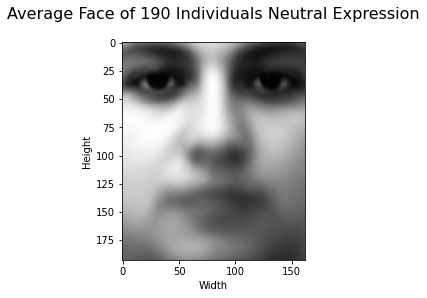

In [8]:
plt.imshow(average_face.reshape(height, width),cmap ='gray')
# Average face of 190 individuals' neutral expression image
plt.title('Average Face of 190 Individuals Neutral Expression\n',fontsize=16) 
plt.xlabel("Width")
plt.ylabel("Height")

## Normalized Faces

In [9]:
face_normal = face_matrix - average_face
print(face_normal.shape)

(190, 31266)


Text(0.5, 0.98, 'Eight Normalized Faces')

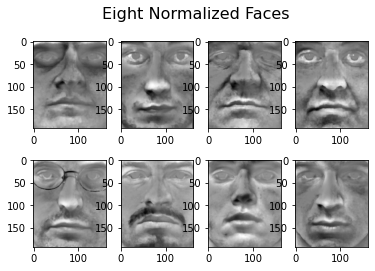

In [10]:
fig, axs = plt.subplots(2,4)
for i in range(0,8):
    plt.subplot(2,4,1+i)
    plt.imshow(face_normal[i,:].reshape(height, width), cmap='gray')
    
fig.suptitle("Eight Normalized Faces", fontsize=16)

## Peform Principal Components Analysis
### 1.Dimensionality Reduction and Computational Efficiency of Eigenfaces
#### Denote the size of image $m \times n$ as $N^2$
<p1>Takeing all face vectors so that we get a matrix $A$ of size of $N^2 \times M$<br/><br/>
    <center>$$A = [\Phi_1,  \Phi_2,  \Phi_3,  ..., \Phi_M]\quad(N^2\times M matrix)$$</center></p1>
    
<p2>The covariance matrix
    <center>\begin{equation}C = \frac{1}{M}\sum_{n=1}^{M}\Phi_n\Phi_n^T
        = AA^T \quad (N^2\times N^2 matrix)\end{equation}</center></p2>


In [11]:
#C = A*A.T
#In my algorithm face_normal is a column vector which should be AT

#Mean normalization: center columns by subtracting column means
AT = face_normal #face_std
A = AT.T

print("A = ",A.shape)
print("AT = ",AT.shape)



A =  (31266, 190)
AT =  (190, 31266)


<p1>We find Covariance matrix by multiplying $A$ by $A^T$. Since $A$ has dimensions $N^2 \times M$, $A^T$ has dimenions $M \times N^2$. Multiplied this gives us matrix of $N^2 \times N^2$, which gives us $N^2$ eigenvectors of $N^2$ size which is not computationally efficient to calculate.
<br/>



In [12]:
%%time
#Caution:C end up with 31266 x 31266
# run this cell may encounter out of memory error!!!!!
start_time = time.time()
C_N2byN2 = np.matmul(A,AT)
print("Done in --- %s seconds ---\n" % (time.time() - start_time))
print("size of Covariance (C_N2byN2)",C_N2byN2.shape)
print("\n")

Done in --- 5.84621787071228 seconds ---

size of Covariance (C_N2byN2) (31266, 31266)


Wall time: 5.85 s


Therefore, we calculate our covariance matrix by multiplying $A^T$ and $A$. This gives us $M \times M$ matrix which has $M$ (assuming $M \ll N^2$) eigenvectors of size $M$<br/></p1>
<br/>
<p2>  \begin{equation}C_{}' = A^{T}A \end{equation}</p2>

<p1>Since $C_{}' = A^{T}A$ and $u_i = A v_i$</p1>

<p2><center>$$A^T A v_i = \lambda_i v_i$$</center></p2>

<p3><center>$$AA^T A v_i = A\lambda_i v_i$$</center></p3>

<p4><center>$$C_{}'u_i = \lambda_i u_i$$</center></p4>

<p5>It can be proofed that $ C_{}'$ and $C$ have same eigenvalues and their eigenvectors are related by the equation $u_{i} = A\nu_{i}$. Thus, the $M$ eigenvalues (and eigenvectors) of covariance matrix gives the $M$ largest eigenvalues(and eigenvectors) of $C_{}'$</p5>

In [13]:
%%time
start_time = time.time()
C = np.matmul(AT,A)
print("Done in --- %s seconds ---\n" % (time.time() - start_time))
print('Size of C = AT*A = '+ str(AT.shape)  + str(A.shape) +' = ' + str(C.shape))
print(C.shape)
print("\n")


Done in --- 0.030505895614624023 seconds ---

Size of C = AT*A = (190, 31266)(31266, 190) = (190, 190)
(190, 190)


Wall time: 31.5 ms



### 2.Computing the covariance matrix
<p2><br/><center>$$C_{}' = A^{T}A $$</center></p2>

In [14]:
print("AT = ",AT.shape)
print("A = ",A.shape)

AT =  (190, 31266)
A =  (31266, 190)


In [15]:
C = np.matmul(AT,A)
print('Size of C = AT*A = '+ str(AT.shape)  + str(A.shape) +' = ' + str(C.shape))
print(C.shape)
face_cov_normal = C
#print(face_cov_normal)

Size of C = AT*A = (190, 31266)(31266, 190) = (190, 190)
(190, 190)



### 3. Calculating the eigenvectors and eigenvalues
#### i) Eigendecomposition
<p1>Perform eigenvalue decomposition on the matrix $A^TA$(190 by 190), obtain a set of 190 orthonormal eigenvectors $v_1; v_2; v_{190}$, and translate them
to eigenvectors for C by</p1>
<br/>
<br/>
<p2>  \begin{equation}u_i = \frac{Av_i}{||Av_i||_2} \end{equation}</p2>

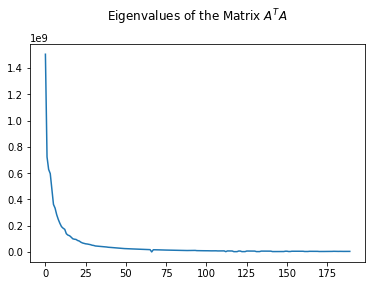

In [16]:
eigen_val , eigen_vec = np.linalg.eig(C)
v = eigen_vec
eigenface = A @ v 
eigenface.shape
u= np.zeros(eigenface.shape)
for i in range(0,v.shape[1]):
    #print(vi.shape)
    norm = np.linalg.norm(A@v[:,i])
    #print(norm)
    u[:,i] = A@v[:,i]/norm
    #print (np.linalg.norm(eigenface[:,i]))
eigenface = u

# Since np.linalg,eig() doesn't guarantee the eigen pairs are in descending order
# visually check the result
plt.plot(eigen_val)
plt.title('Eigenvalues of the Matrix $A^TA$\n')
plt.show()

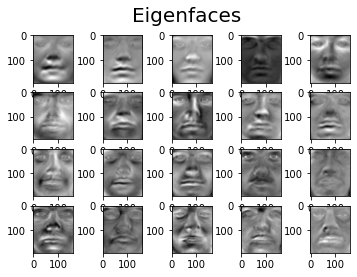

In [17]:
for i in range(0,20):
    img = u[:,i].reshape(height,width)
    plt.subplot(4,5,1+i)
    plt.suptitle("Eigenfaces", fontsize=20)
    plt.imshow(img, cmap='gray')
plt.show()

#### iI) SVD
<p><center>$$C = US V^T$$</center></p>
where $U$ and $V^T$ are square and $S$ has the same size as $C$. $S$ is a diagonal matrix and it diagonal contains the singular values of A, organized from largest to smallest. These values are always non-negative and can be used as an indicator of the “importance” of some features represented by the matrix $C$.

In [18]:
#s is vector with the singular values, within each vector sorted in descending order.
# using economic SVD to reduce compuation time
U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)
S =np.diag(s)
V = VT.T
print("Size of Covarience",face_cov_normal.shape)
print("Size of U:", U.shape)
print("Size of s:",s.shape)
print("Size of V:",V.shape)
print(U.shape, S.shape, VT.shape)

Size of Covarience (190, 190)
Size of U: (190, 190)
Size of s: (190,)
Size of V: (190, 190)
(190, 190) (190, 190) (190, 190)


## Implementation and Experiments:
#### (a) Compute the principal components (PCs) using first 190 individuals’ neutral expression image. Plot the singular values of the data matrix and justify your choice of principal components.

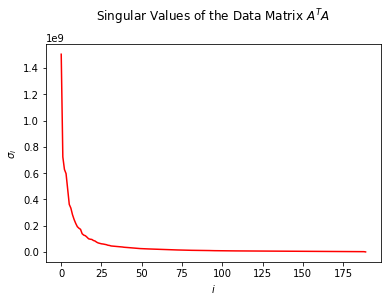

Maximum of Singular Value  = 1504308086.5383117
Minimum of Singular Value = 3.748986775992301e-07


In [19]:
plt.plot(s, c='r')
plt.title('Singular Values of the Data Matrix $A^TA$\n')
plt.xlabel("$i$") 
plt.ylabel("$\sigma_i$") 
plt.show()
print('Maximum of Singular Value  = %s'%max(s))
print('Minimum of Singular Value = %s'%min(s))

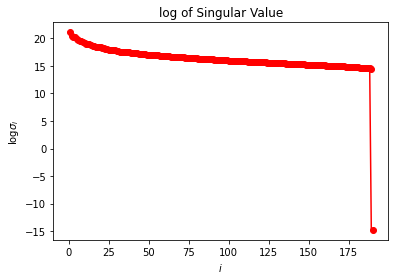

In [20]:
num_PC =range(1,191)
plt.plot(np.log(s),c='r')
plt.scatter(num_PC,np.log(s),c='r')
plt.title("log of Singular Value")
plt.xlabel("$i$") 
plt.ylabel("$\log\sigma_i$") 
plt.show()

<p1>There are total 190 eigenvalue and 190 corresponding eigenvector. Since the singular value is the square root of the eigenvalue:<br/><center>$\sigma_i = \sqrt{\lambda_i}$</center> <br/>and <center>$\sigma_0 > \sigma_1 > ... > \sigma_{M-1}$</center></p1>
<br/>
<p2>We are going to keep only $K$ eigenvectors corresponding to the $K$ largest eigenvalues. And we are going to pick $K$ based on percentage of the varience explained, for instance, $99$%, $95%$% ,$90%$% ,$85%$% .etc  </p2>


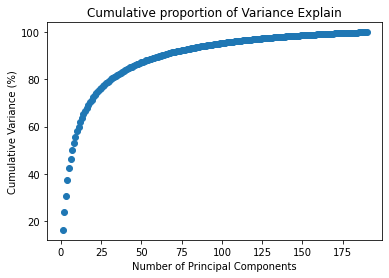

In [21]:

variance_ratio = s / np.sum(s)
cum_var_ratio = np.cumsum(variance_ratio)
#print("Cumulative proportion of variance explained : \n%s" %var_exp)

num_PC =range(1,191)
plt.title('Cumulative proportion of Variance Explain')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')

plt.scatter(num_PC,cum_var_ratio*100)
plt.show()

## Equation that find number of eigenvector K based on 99% of the varience is retained
<p1>For given $K$ <center>\begin{equation}1\quad - \quad\frac{\sum_{i=1}^{K} S_{ii}}{\sum_{i=1}^{M} S_{ii}}\quad\leq\quad 0.01\end{equation}</center></p1>
<br />
<p2>$$\quad\frac{\sum_{i=1}^{K} S_{ii}}{\sum_{i=1}^{M} S_{ii}}\quad\geq\quad 0.99$$</p2>

In [22]:
def findk (s,percentage):
    k = 0;
    total = 0
    if (percentage > 1):
        print("Percentage should not greater than 1\n")
        return 0
    
    for s_val in s:
        variance_ratio = s[k] /sum(s)
        
        if( total+ variance_ratio < percentage):
            total = (total + variance_ratio)
            k = k + 1
        else:
            percentage_variance = total*100
            print("%.5f%% of variance is retained!"%percentage_variance,"\n")
            print("K = ",k,"\n")
            return k

In [23]:
k99 = findk(s,0.99)
k95 = findk(s,0.95)
k90 = findk(s,0.90)
k85 = findk(s,0.85)

98.99601% of variance is retained! 

K =  157 

94.90354% of variance is retained! 

K =  95 

89.91288% of variance is retained! 

K =  61 

84.78984% of variance is retained! 

K =  42 



<p1>From the algorithm above, we can see about 99% of variance is retained when $K = 157$. Hence, we choose $ K = 157$. There are $158$ pairs of Eigenvalues and Eigenvectors $\lambda_0 ... \lambda_{157}$ and $v_0 ...v_{157}$.</p1>

In [24]:
k = findk(s,0.99)

98.99601% of variance is retained! 

K =  157 



### Code and comments above answer question (a)
# --------------------------------------------------------------------------------------------------------------

## Reconstructing an Face Image using Eigenface
#### (b) Reconstruct one of 190 individuals’ neutral expression image using different number of PCs. As you vary the number of PCs, plot the mean squared error (MSE) of reconstruction versus the number of principal components to show the accuracy of reconstruction. Comment on your result.

### Eigenface

In [25]:
# Recall U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)
U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)
Z=U.T@A.T #eigenface
Z.shape

(190, 31266)

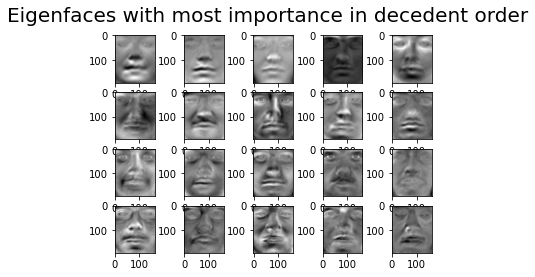

In [26]:
for i in range(0,20):
    img = Z[i,:].reshape(height,width)
    plt.subplot(4,5,1+i)
    plt.suptitle("Eigenfaces with most importance in decedent order", fontsize=20)
    plt.imshow(img, cmap='gray')
plt.show()

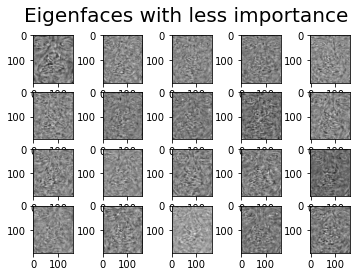

In [27]:
for i in range(1,21):
    img = Z[-i,:].reshape(height,width)
    plt.subplot(4,5,0+i)
    plt.suptitle("Eigenfaces with less importance", fontsize=20)
    plt.imshow(img, cmap='gray')
plt.show()

<p1>From figure above, we can see that the information of eigenface decreas as the singular value decrease. The first 20 eigenface is clearly a face even though they look like ghost faces. We can still recognize their eyes, nose and mouth easily.</p1>

<p2>However the last 19 eigenface do not contain enough infomation of a face. It's hard for us to recognize it as a face rather than noise. Therefore, those of eigenface with low varience explained can be drop and the eigenface can be reduced.</p2>

## b) Face Reconstruction by using different number of PCs.

(31266,)


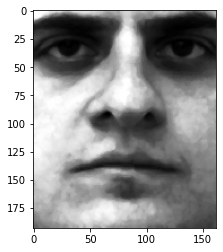

In [28]:
# Image 1a (neutral)
imgM = plt.imread('./trainingface/'+ str(1) +'a.jpg')
plt.imshow(imgM, cmap='gray')
imgV_smile = np.array(imgM).flatten() # vectorization
print(imgV.shape)

In [29]:
# Recall U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)
U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)

In [30]:
k=190
U_reduced = U[:,:k]
Z=U_reduced.T@A.T
X=U_reduced@Z + average_face

In [31]:
gamma = Image.open('./trainingface/'+ str(1) +'a.jpg').convert('L') #greyscale
gammaV = np.array(gamma).flatten()


In [32]:
gammahat = X[0,:].reshape(height,width)
gammahatV = np.array(gammahat).flatten()
#print (gammahatV)


In [33]:
#plt.imshow(gammahat, cmap='gray')
#plt.title('Neutral Face Reconstruction by 190 Eigenface\n',fontsize=16)
#plt.show()

<p2>  \begin{equation} MSE = \frac{1}{MN}||\hat{\Gamma_i}-\Gamma_i||_2 \end{equation}</p2>

In [34]:
mse = np.mean(((gammaV - gammahatV)**2))
print("MSE by using 190 PCs = ", mse)

MSE by using 190 PCs =  2.017018393361881e-26


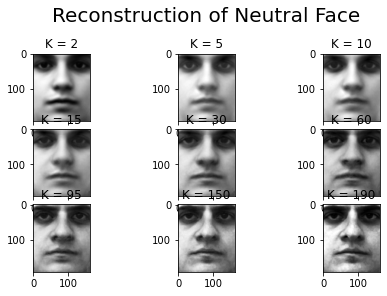

In [35]:
K=[2,5,10,15,30,60,95,150,190]
numPC = range(1,191)
fig, axs=plt.subplots(3, 3,constrained_layout=True)
i=0
for k in K:
    U_reduced = U[:,:k]
    Z=U_reduced.T@A.T
    X=U_reduced@Z + average_face
    gammahat = X[0,:].reshape(height,width)
    plt.subplot(3,3,1+i)
   
    plt.title("K = %s"%k)
    i=i+1
    #print (gammahatV)
  
    
    plt.imshow(gammahat, cmap='gray')
       
plt.suptitle("Reconstruction of Neutral Face", fontsize=20)    
plt.show()

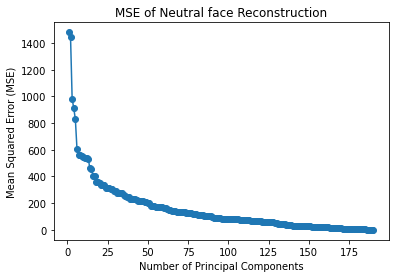

In [36]:
# Recall U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)
U, s, VT = np.linalg.svd(face_cov_normal, full_matrices = 0)

MSE=[]
K=range(0, 190)
numPC = range(1,191)
for k in K:
    U_reduced = U[:,:k]
    Z=U_reduced.T@A.T
    X=U_reduced@Z + average_face
    gammahat = X[0,:].reshape(height,width)
    gammahatV = np.array(gammahat).flatten()
    #print (gammahatV)
    #plt.imshow(gammahat, cmap='gray')
    mse=np.mean(((gammaV - gammahatV)**2))
    MSE.append(mse)
plt.plot(numPC,MSE)
plt.scatter(numPC,MSE)
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Number of Principal Components')
plt.title('MSE of Neutral face Reconstruction')
plt.show()

<p1> From the trend MSE versus the number of PC, we can see that MSE decrease quickly when first 10 PCs are used to reconstruct the face image. This is because first several eigenface contain a large portion of infomation. As there are more PC included, the MSE approches to zero which means the face reconstruction is more accurate. Image of face changes from an average face to a distintive and informative face as number of PCs increase.</p1>


### Code and comments above answer question (b)
# --------------------------------------------------------------------------------------------------------------

#### (c) Reconstruct one of 190 individuals’ smiling expression image using different number of PCs. Again, plot the MSE of reconstruction versus the number of principal components and comment on your result.

(31266,)


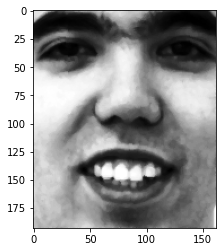

In [37]:
# Image 9b
imgM_smile = plt.imread('./trainingface/'+ str(9) +'b.jpg')
plt.imshow(imgM_smile, cmap='gray')
imgV_smile = np.array(imgM_smile).flatten() # vectorization
print(imgV_smile.shape)

In [38]:
smile_face_norm = imgV_smile - average_face
smile_face_norm.shape
#plt.imshow(smile_face_norm.reshape(height,width), cmap='gray')
w_unknown = np.dot(u.T,smile_face_norm)
smile_recon_norm = np.dot(u,w_unknown)
smile_recon_norm.shape

smile_recon = smile_recon_norm + average_face
#plt.imshow(smile_recon.reshape(height,width), cmap='gray')
gammaV = imgV_smile
gammahatV = smile_recon
mse = np.mean(((gammaV - gammahatV)**2))
#print("MSE = ", mse)

In [39]:
# Generate 3 x 3 plot each with different k to reconstuct the image 
def getfaceplot (K,numPC,u,face_norm,average_face):
    
    fig, axs=plt.subplots(3, 3,constrained_layout=True)
    i=0
    for k in K:
        u_reduced = u[:,:k]
        w_unknown = np.dot(u_reduced.T,face_norm)
        smile_recon_norm = np.dot(u_reduced,w_unknown)
        smile_recon = smile_recon_norm + average_face
        plt.subplot(3,3,1+i)
        plt.title("K = %s"%k)
        i=i+1
        #print (gammahatV)
        plt.imshow(smile_recon.reshape(height,width), cmap='gray')
   

In [40]:
# Generate MSE plot with # of Pcs from 1 to full
def getfaceMSE (K,numPC,u,smile_face_norm,average_face,imgV_smile):
    MSE_smile=[]

    for k in K:
        u_reduced = u[:,:k]
        w_unknown = np.dot(u_reduced.T,smile_face_norm)
        smile_recon_norm = np.dot(u_reduced,w_unknown)
        gammahatV = smile_recon_norm + average_face
        #print (gammahatV)
        #plt.imshow(gammahat, cmap='gray')
        gammaV = imgV_smile
        mse=np.mean(((gammaV - gammahatV)**2))
        MSE_smile.append(mse)
    plt.plot(numPC,MSE_smile)
    plt.scatter(numPC,MSE_smile)
    plt.ylabel('Mean Squared Error (MSE)')
    plt.xlabel('Number of Principal Components')


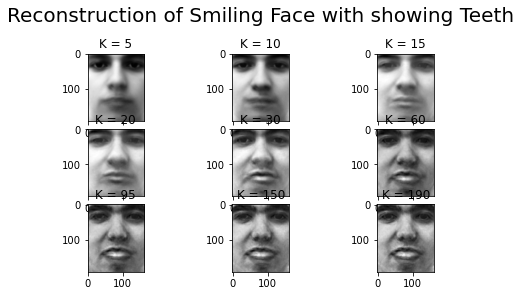

In [41]:
K=[5,10,15,20,30,60,95,150,190]
numPC = range(1,191)

getfaceplot (K,numPC,u,smile_face_norm,average_face)

plt.suptitle("Reconstruction of Smiling Face with showing Teeth", fontsize=20)  
plt.show()

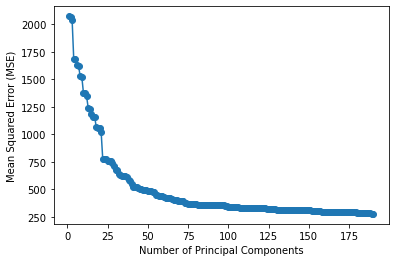

In [42]:
K=range(0, 190)
numPC = range(1,191)
getfaceMSE (K,numPC,u,smile_face_norm,average_face,imgV_smile)

The smiling face reconstruction show above is not as good as the result of reconstructing a neutral face we did in b. Since we never train any smiling face during training, the model had a hard time in recovering the image especially the mouth, teeth and parts around it.

As there are more eigenface include, the more detailed the recovered face will be(MSE will decrease). Including more smiling face in the traning data will surely improve the result.

I noticed that there are several jumps in MSE plot which reduced the MSE rapidly.#######################################

In the figure below, those smilling faces which do not show their teeth, we might get a better reconstruction. When same amount of PCs are chosen, the MSE is much smaller and our model is more accuraty to reconsturct smilling face without showing teeth. 

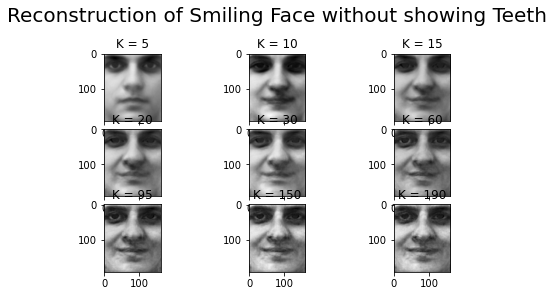

In [43]:
# image 1b (smile)
imgM_smile_1 = plt.imread('./trainingface/'+ str(1) +'b.jpg')
imgV_smile_1 = np.array(imgM_smile_1).flatten()
smile_face_norm_1 = imgV_smile_1 -average_face

K=[5,10,15,20,30,60,95,150,190]
numPC = range(1,191)
getfaceplot (K,numPC,u,smile_face_norm_1,average_face)

plt.suptitle("Reconstruction of Smiling Face without showing Teeth", fontsize=20) 
plt.show()

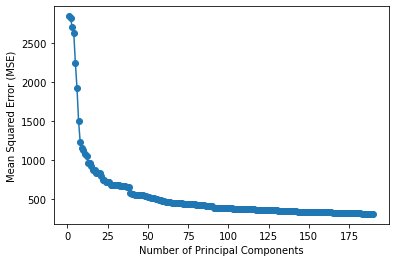

In [44]:
K=range(0, 190)
numPC = range(1,191)
getfaceMSE (K,numPC,u,smile_face_norm_1,average_face,imgV_smile_1)

### Code and comments above answer question (c)
# --------------------------------------------------------------------------------------------------------------

#### (d) Reconstruct one of the other 10 individuals’ neutral expression image using differentnumber of PCs. Again, plot the MSE of reconstruction versus the number of principal components and comment on your result.

(31266,)


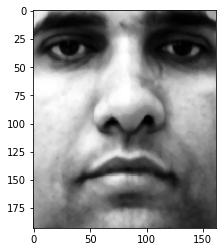

In [45]:
# Image  191a (neutral) 
imgM_neutral_191 = plt.imread('./trainingface/'+ str(191) +'a.jpg')
plt.imshow(imgM_neutral_191, cmap='gray')
imgV_neutral_191 = np.array(imgM_neutral_191).flatten() # vectorization
print(imgV_smile.shape)

In [46]:
neutral_face_norm_191 = imgV_neutral_191 - average_face
neutral_face_norm_191.shape
#plt.imshow(smile_face_norm.reshape(height,width), cmap='gray')
w_unknown_191 = np.dot(u.T,neutral_face_norm_191)
neutral_recon_norm_191 = np.dot(u,w_unknown_191)
neutral_recon_norm_191.shape

(31266,)

In [47]:
neutral_recon_191 = neutral_recon_norm_191 + average_face
#plt.imshow(neutral_recon_191.reshape(height,width), cmap='gray')
gammaV_191 = imgV_neutral_191
gammahatV_191 = neutral_recon_191
mse_191 = np.mean(((gammaV_191 - gammahatV_191)**2))
#print("MSE = ", mse)

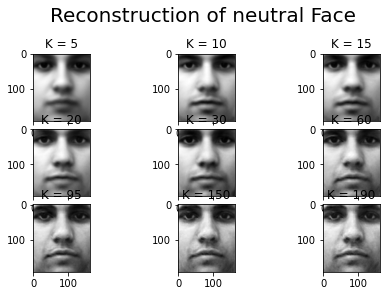

In [48]:
# image 191b (neutral)
K=[5,10,15,20,30,60,95,150,190]
numPC = range(1,191)
getfaceplot (K,numPC,u,neutral_face_norm_191,average_face)

plt.suptitle("Reconstruction of neutral Face ", fontsize=20) 
plt.show()

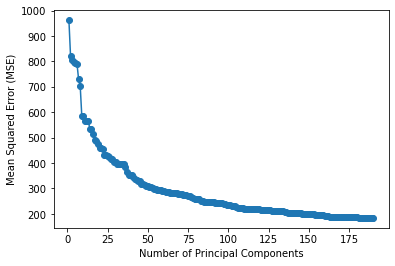

In [49]:
K=range(0, 190)
numPC = range(1,191)
getfaceMSE (K,numPC,u, neutral_face_norm_191, average_face, imgV_neutral_191)

The result for unknow neutral face reconsturction is good enough. From the slope of MSE plot, the MSE decrese rapidly when the first several PCc are introduced.

However the MSE is still relatively larger comparing the result from b. We need more PCs to detaily recover the image than we did in b.

Hence, model performs better to a trained neutral face than a new unknown neutral face.

### Code and comments above answer question (d)
# --------------------------------------------------------------------------------------------------------------

#### (e) Use any other non-human image (e.g., car image, resize and crop to the same size), and try to reconstruct it using all the PCs. Comment on your results.

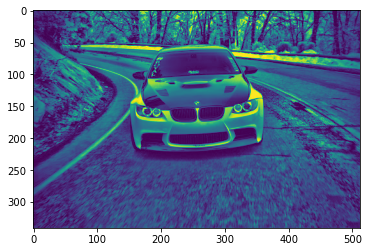

In [50]:
car= Image.open('./trainingface/car.jpg').convert('L')
plt.imshow(car)

In [51]:
car_resize = car.resize((350,300))
#plt.imshow(car_resize)

(162, 193)


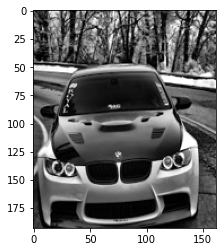

In [52]:
im_crop = car_resize.crop((100, 0, 100+162, 193))
print(im_crop.size)
plt.imshow(im_crop, cmap = 'gray')

In [53]:
carV = np.array(im_crop).flatten()
carV.shape
carV_norm = carV - average_face
carV_norm.shape

(31266,)

In [54]:
def recon_full(u,norm,average_face):
    height =193
    width  =162
    w = np.dot(u.T,norm)
    recon_norm = np.dot(u,w)
    recon = recon_norm + average_face
    plt.imshow(recon.reshape(height,width),cmap='gray')

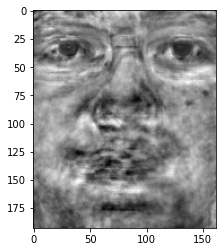

In [55]:
recon_full(u,carV_norm,average_face)


Unsurprisingly reconstuction of car image give back a face iamge. Since we only use face as our training set and train our model, our model reacts pooly to reconstruct car image. The model is taking a car image as input and trying to reconstruct back a human face imager as output.

### Code and comments above answer question (e)
# --------------------------------------------------------------------------------------------------------------

#### (f) Rotate one of 190 individuals’ neutral expression image with different degrees and try to reconstruct it using all PCs. Comment on your results.

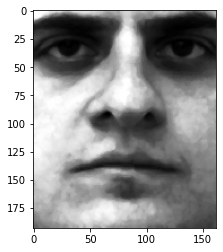

In [56]:
# Image 1a (neutral)
imgM = Image.open('./trainingface/'+ str(1) +'a.jpg')
plt.imshow(imgM, cmap='gray')
plt.show()

In [57]:
# 5
rotate_img_5= imgM.rotate(5)
img_5_norm = np.array(rotate_img_5).flatten() - average_face 

#10
rotate_img_10= imgM.rotate(10)
img_10_norm = np.array(rotate_img_10).flatten() - average_face 

#15
rotate_img_15= imgM.rotate(15)
img_15_norm = np.array(rotate_img_15).flatten() - average_face

#20
rotate_img_20= imgM.rotate(20)
img_20_norm = np.array(rotate_img_20).flatten() - average_face 

#30
rotate_img_30= imgM.rotate(30)
img_30_norm = np.array(rotate_img_30).flatten() - average_face 

#45
rotate_img_45= imgM.rotate(45)
img_45_norm = np.array(rotate_img_45).flatten() - average_face

#90
rotate_img_90= imgM.rotate(90)
img_90_norm = np.array(rotate_img_90).flatten() - average_face

#180
rotate_img_180= imgM.rotate(180)
img_180_norm = np.array(rotate_img_180).flatten() - average_face

#225
rotate_img_225= imgM.rotate(225)
img_225_norm = np.array(rotate_img_225).flatten() - average_face

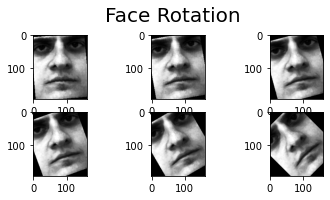

In [58]:
plt.figure(1)
plt.subplot(3,3,1)
plt.imshow(rotate_img_5, cmap='gray')

plt.subplot(3,3,2)
plt.imshow(rotate_img_10, cmap='gray')

plt.subplot(3,3,3)
plt.imshow(rotate_img_15, cmap='gray')

plt.subplot(3,3,4)
plt.imshow(rotate_img_20, cmap='gray')

plt.subplot(3,3,5)
plt.imshow(rotate_img_30, cmap='gray')

plt.subplot(3,3,6)
plt.imshow(rotate_img_45, cmap='gray')


plt.suptitle("Face Rotation", fontsize=20) 
plt.show()


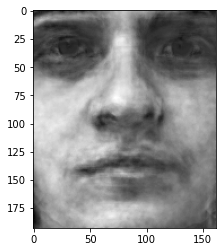

In [59]:
recon_full(u,img_5_norm,average_face)

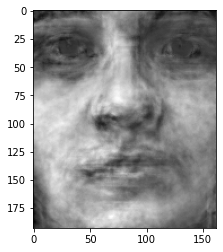

In [60]:
recon_full(u,img_10_norm,average_face)

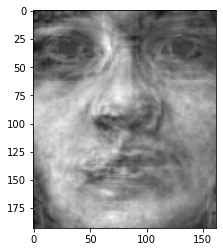

In [61]:
recon_full(u,img_15_norm,average_face)

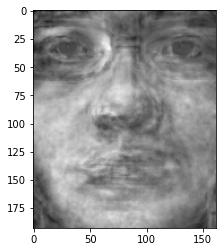

In [62]:
recon_full(u,img_20_norm,average_face)

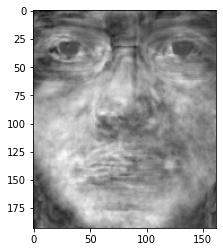

In [63]:
recon_full(u,img_30_norm,average_face)

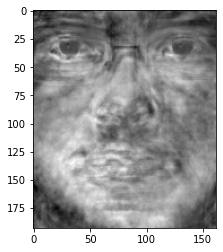

In [64]:
recon_full(u,img_45_norm,average_face)

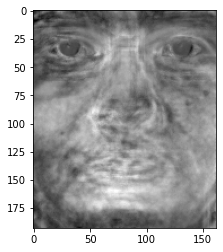

In [65]:
recon_full(u,img_90_norm,average_face)

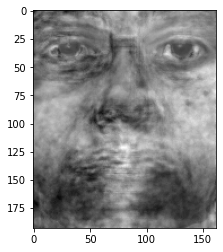

In [66]:
recon_full(u,img_180_norm,average_face)

If we rotate the test image by any angle, we will still get a face without rotation. However, we are not going to get back the original image (the image is distorted), since there is no rotation of face in our training sets. 

The model requires a test image be center and face forward. Our model still treats the test face without any rotation which leads to an inaccurate reconstruction.

Moreover, it does not guarantee we can reconstruct a rotated image even if we includes rotation face in our training data.


### Code and comments above answer question (f)
# --------------------------------------------------------------------------------------------------------------

## Summary

From the experiment above, we found that we are able to use eigenface(Eigenvectors of the training data) to reconstruct the face image in our training set perfactly.

When a test face is similar to our training set, we can still reconstuct the image with some erros. The reconstuction of and old face has a better accuracy than new face. The more PCs we choose, the more accurate the reconstruction is.

When the test image is not a face or rotation of face, our model will treat it as a face and reconstuct a face image instead. A solution to this might be include some non-human face images and rotation images of human faces during the training. Although this will make our tranning data become larger and larger. We can perform PCA to reduce the dimension and improve computational efficiency.

The idea of eigenface can be used for further in face detection and recognition while maintians low computational cost. It is fast, relatively simple and has been show to work well in a constrained enviroment.